**Shayan Chowdhury** (UNI: sc4040)

**QMSS 5074: Advanced Machine Learning Projects** - Assignment 1

**AI Model Share Username:** sc4040

**Link to Public Github Repository w/ Final Report:** https://github.com/shayantist/ColumbiaAdvancedML


# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Share your models to a centralized leaderboard
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit model to competition
5. Repeat submission process to improve place on leaderboard



In [ ]:
#install aimodelshare library
! pip install aimodelshare --upgrade

## 0. Get data in and set up X_train, X_test, y_train objects

**Instructions:**
Upload the world_happiness_competition_data.zip and newcountryvars.csv files on Colab by pressing the Folder icon on left tab (Shows "Files" on hovering), and then clicking the left-most file upload button (Shows "Upload to Session Storage" Alt text on hovering)

In [ ]:
# Get competition data from course folder and unzip importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:

    # Extracting all the members of the zip into a specific location.
    zObject.extractall()

In [ ]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv') ## Load test features to predict on
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv') ## Load y train (true labels)
y_train_labels = y_train.idxmax(axis=1) ## Examine what this does and write in next cell

X_train.head()

Country or region  GDP per capita  Social support  Healthy life expectancy  \
0              Peru           0.960           1.274                    0.854   
1         Nicaragua           0.694           1.325                    0.835   
2            Greece           1.181           1.156                    0.999   
3             Qatar           1.684           1.313                    0.871   
4        Uzbekistan           0.745           1.529                    0.756   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.455       0.083                      0.027   
1                         0.435       0.200                      0.127   
2                         0.067       0.000                      0.034   
3                         0.555       0.220                      0.167   
4                         0.631       0.322                      0.240   

         name    region                       sub-region  Terrorist_attacks  
0        Peru  Americas  Latin America and the Caribbean          18.000000  
1   Nicaragua  Americas  Latin America and the Caribbean         125.611111  
2      Greece    Europe                  Southern Europe         112.000000  
3       Qatar      Asia                     Western Asia          57.333333  
4  Uzbekistan      Asia                     Central Asia         125.611111

Write in the next cell what the y_train_labels = y_train.idxmax(axis=1) line does. What is the difference between y_train_labels and y_train?

In [ ]:
# Your answer:
# Since y_train contains a one-hot encoded version of the target variable, the idxmax function allows us to get the index of the maximum value in each row corresponds to the actual label of the target variable for that row.
# As a result, y_train_labels is a series containing the corresponding Happiness category (Average, High, etc.) for each row/country in the training data.

In [ ]:
# Truncated and cleaned up region data to merge (Week 4 folder)
countrydata=pd.read_csv("newcountryvars.csv")

countrydata.head()

country_name  population  population_below_poverty_line       hdi  \
0        India  1339180127                           21.9  0.623559   
1      Nigeria   190886311                           70.0  0.527105   
2       Mexico   129163276                           46.2  0.761683   
3     Pakistan   197015955                           29.5  0.550354   
4   Bangladesh   164669751                           31.5  0.578824   

   life_expectancy  expected_years_of_schooling  mean_years_of_schooling  \
0           68.322                    11.696590                 6.298834   
1           53.057                     9.970482                 6.000000   
2           76.972                    13.299090                 8.554985   
3           66.365                     8.106910                 5.089460   
4           71.985                    10.178706                 5.241577   

            gni  
0   5663.474799  
1   5442.901264  
2  16383.106680  
3   5031.173074  
4   3341.490722

In [ ]:
# Merge in new data to X_train and X_test by taking "Country or region" from first table and "country_name" from 2nd table.
X_train = pd.merge(X_train, countrydata, left_on="Country or region", right_on="country_name", how="left")
X_test = pd.merge(X_test, countrydata, left_on="Country or region", right_on="country_name", how="left")

In [ ]:
X_train.head(1)

Country or region  GDP per capita  Social support  Healthy life expectancy  \
0              Peru            0.96           1.274                    0.854   

   Freedom to make life choices  Generosity  Perceptions of corruption  name  \
0                         0.455       0.083                      0.027  Peru   

     region                       sub-region  Terrorist_attacks country_name  \
0  Americas  Latin America and the Caribbean               18.0         Peru   

   population  population_below_poverty_line       hdi  life_expectancy  \
0  32165485.0                           22.7  0.739749           74.814   

   expected_years_of_schooling  mean_years_of_schooling          gni  
0                     13.38634                  9.01347  11294.84033

# EDA

Describe what you see above?

In [ ]:
## Your answer:
# A majority of the columns are of type float64, which is expected since they are all numerical features.
# Population is of type int64, which is also expected since it is a count of people which should be a whole number.
# The rest of the columns are of type object, which makes sense since they are all strings (e.g. country_name, Country or region, etc.)
# Apart from the columns "country_name" and "Country or region", the rest of the object columns are one-hot encoded versions of the categorical features.

Find out the number and percentage of missing values in the table per column

In [ ]:
# Your code here:
for col in X_train.columns:
    col_na = X_train[col].isna().sum()
    col_na_percent = (col_na / len(X_train)) * 100
    print(f"Column {col}: {col_na} / {len(X_train)} missing ({col_na_percent:.2f}%)")

Column Country or region: 0 / 88 missing (0.00%)
Column GDP per capita: 0 / 88 missing (0.00%)
Column Social support: 0 / 88 missing (0.00%)
Column Healthy life expectancy: 0 / 88 missing (0.00%)
Column Freedom to make life choices: 0 / 88 missing (0.00%)
Column Generosity: 0 / 88 missing (0.00%)
Column Perceptions of corruption: 0 / 88 missing (0.00%)
Column name: 0 / 88 missing (0.00%)
Column region: 0 / 88 missing (0.00%)
Column sub-region: 0 / 88 missing (0.00%)
Column Terrorist_attacks: 0 / 88 missing (0.00%)
Column country_name: 6 / 88 missing (6.82%)
Column population: 6 / 88 missing (6.82%)
Column population_below_poverty_line: 15 / 88 missing (17.05%)
Column hdi: 6 / 88 missing (6.82%)
Column life_expectancy: 6 / 88 missing (6.82%)
Column expected_years_of_schooling: 6 / 88 missing (6.82%)
Column mean_years_of_schooling: 6 / 88 missing (6.82%)
Column gni: 6 / 88 missing (6.82%)


Plot the frequency distribution / histogram of some of the numerical features that you think are important

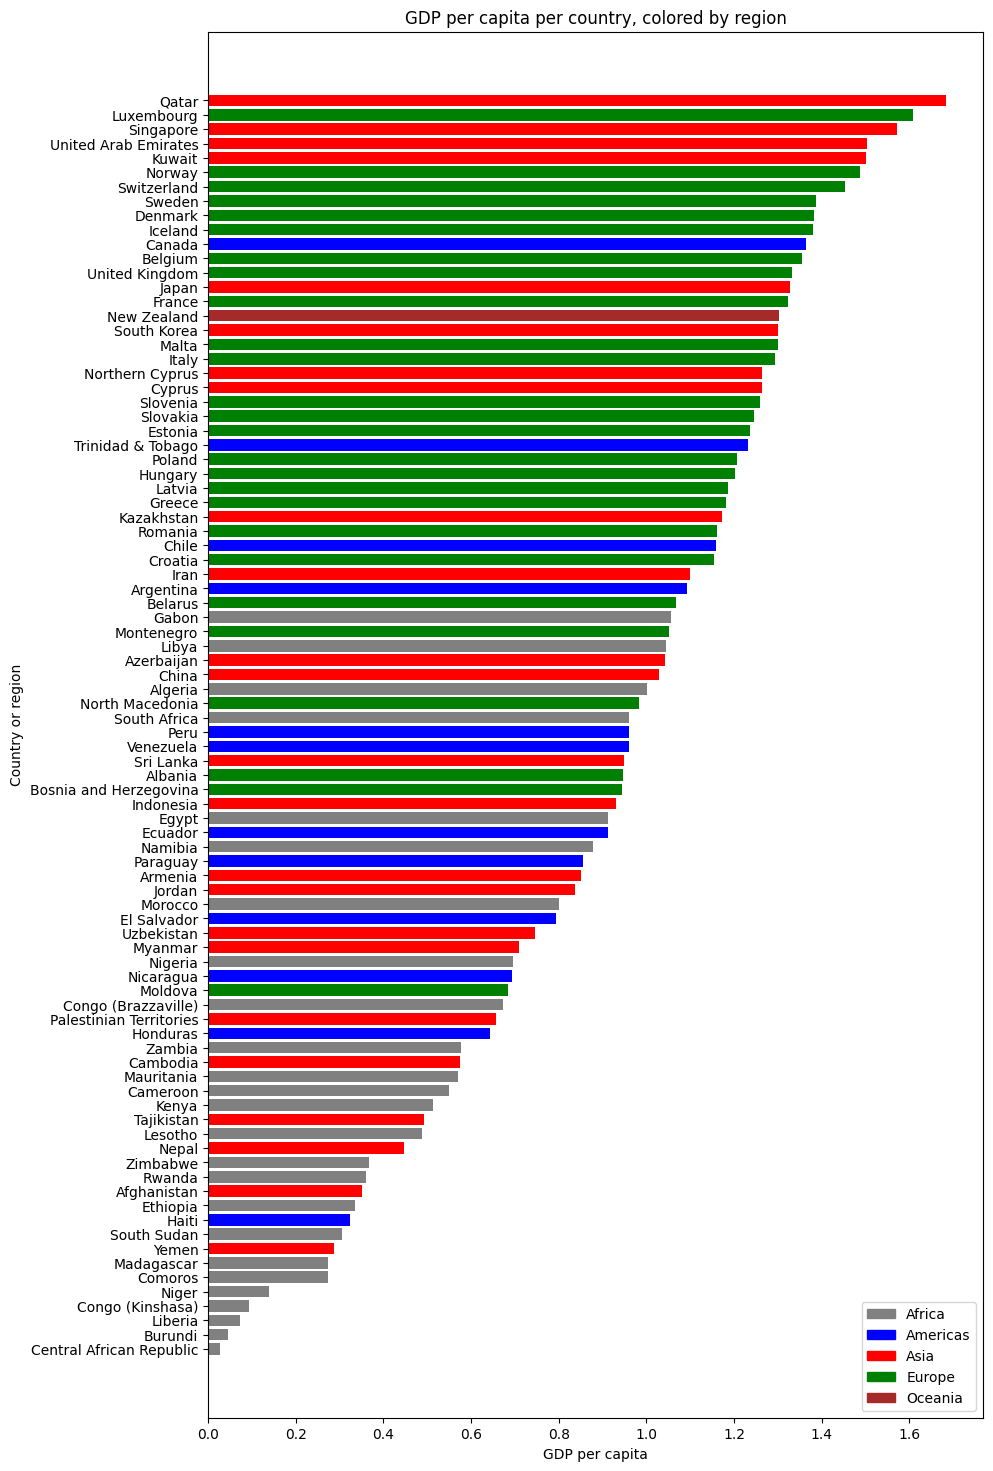

In [ ]:
# Plot of the GDP per capita for each country
# Note: the bar color indicates the region of the country
import matplotlib.pyplot as plt

# Color mapping for each region (no semantic meaning, just for visualization purposes!)
color_mapping = {
    'Africa': 'grey',
    'Americas': 'blue',
    'Asia': 'red',
    'Europe': 'green',
    'Oceania': 'brown',
}

tmp = X_train.sort_values(by="GDP per capita") # Temp dataframe for sorting
plt.figure(figsize=(10, 18))
plt.barh(tmp["Country or region"], tmp["GDP per capita"], color=[color_mapping[region] for region in tmp["region"]])
plt.xlabel("GDP per capita")
plt.ylabel("Country or region")
plt.title("GDP per capita per country, colored by region")

# Add legend for regional color mapping
legend_elements = [plt.Rectangle((0, 0), 1, 1, color=color_mapping[region], label=region) for region in color_mapping]
plt.legend(handles=legend_elements)

plt.show()

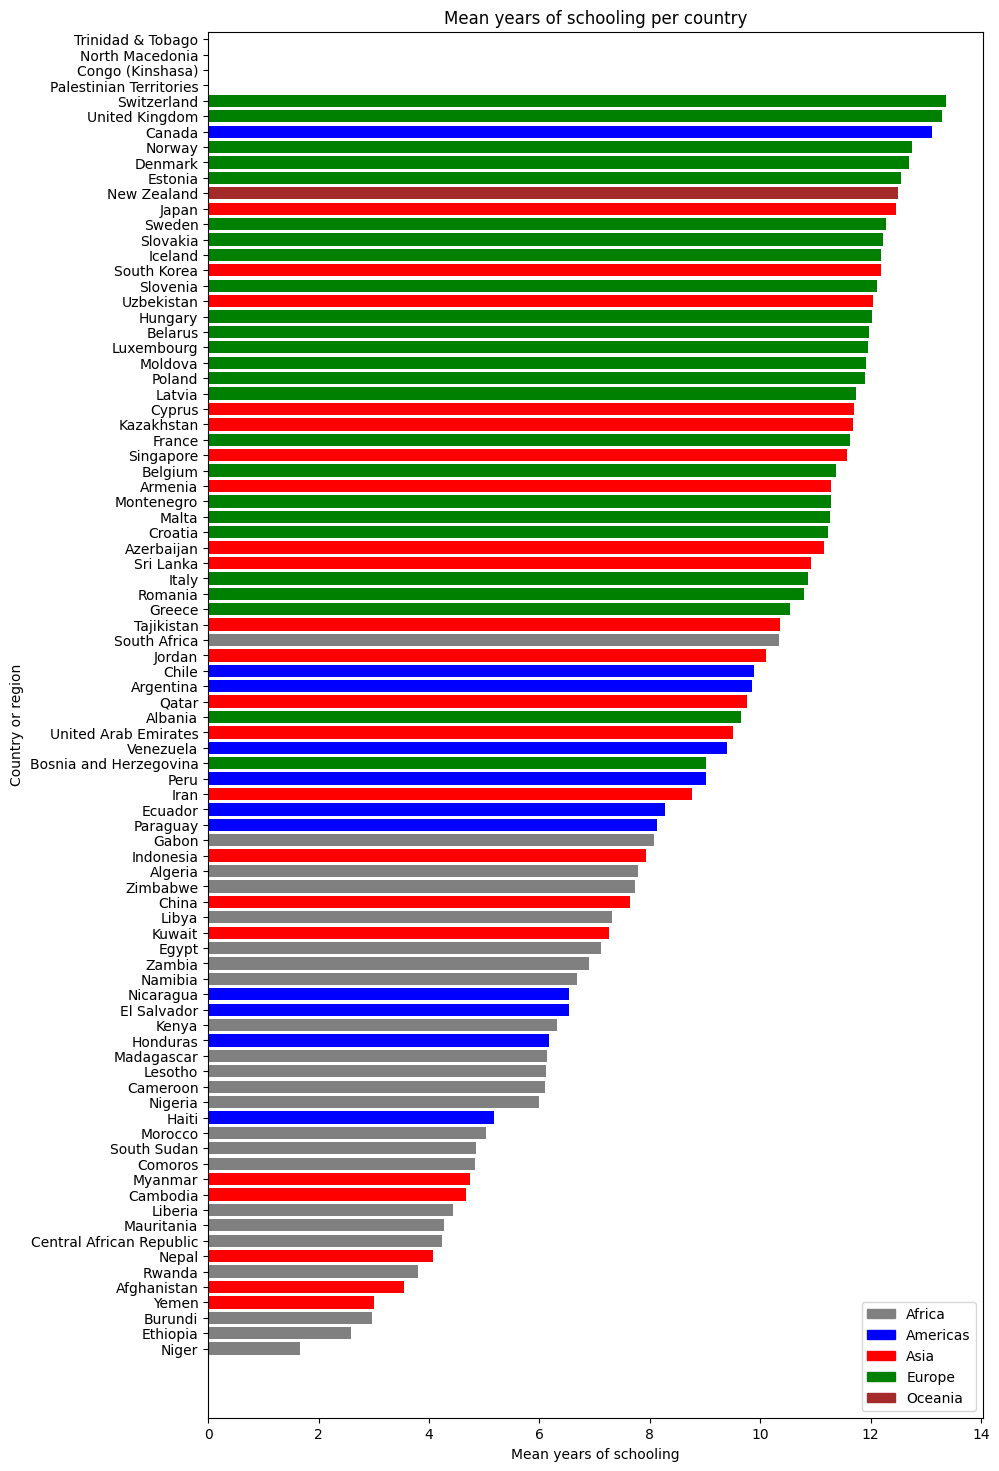

In [ ]:
# Plot of the mean years of schooling for each country with again, the color of the bar indicating the region of the country
tmp = X_train.sort_values(by="mean_years_of_schooling")
plt.figure(figsize=(10, 18))
plt.barh(tmp["Country or region"], tmp["mean_years_of_schooling"], color=[color_mapping[region] for region in tmp["region"]])
plt.xlabel("Mean years of schooling")
plt.ylabel("Country or region")
plt.title("Mean years of schooling per country")

# Add legend for regional color mapping
plt.legend(handles=legend_elements)
plt.show()

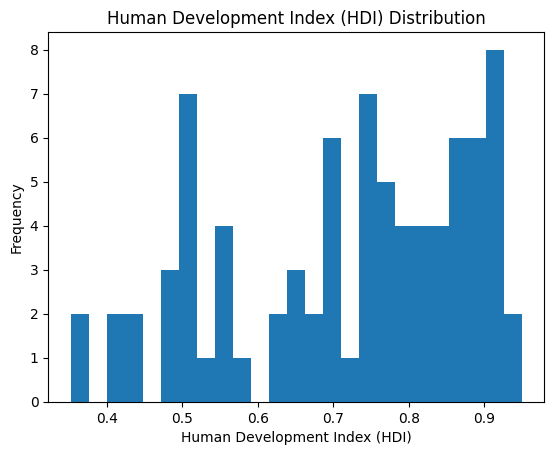

In [ ]:
# Plot the frequency distribution of HDI
plt.hist(X_train["hdi"], bins=25)
plt.xlabel("Human Development Index (HDI)")
plt.ylabel("Frequency")
plt.title("Human Development Index (HDI) Distribution")
plt.show()

Plot the categorical variables and their distribution

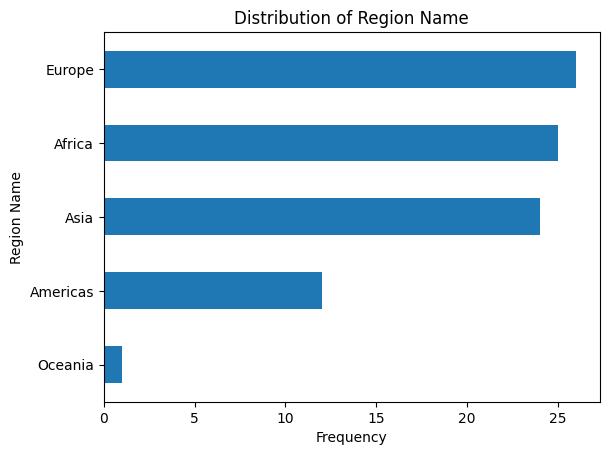

In [ ]:
# Plot of the distribution of the categorical/object-typed 'region' column
X_train["region"].value_counts().sort_values().plot(kind="barh")
plt.xlabel("Frequency")
plt.ylabel("Region Name")
plt.title("Distribution of Region Name")
plt.show()

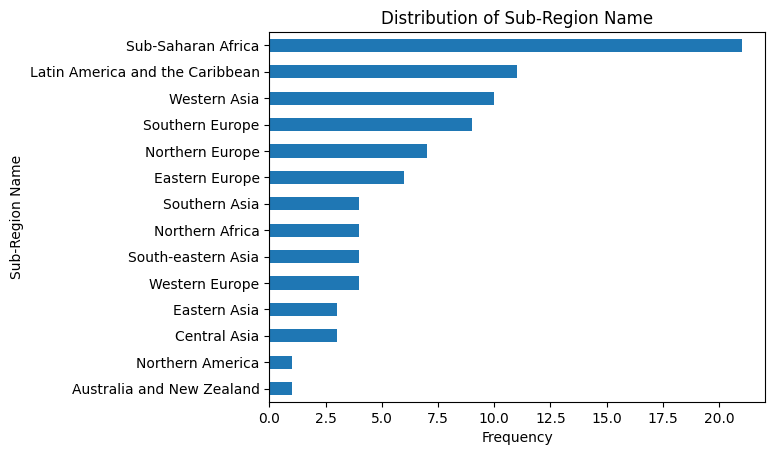

In [ ]:
# Plot of the distribution of the categorical/object-typed 'sub-region' column
X_train["sub-region"].value_counts().sort_values().plot(kind="barh")
plt.xlabel("Frequency")
plt.ylabel("Sub-Region Name")
plt.title("Distribution of Sub-Region Name")
plt.show()

Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

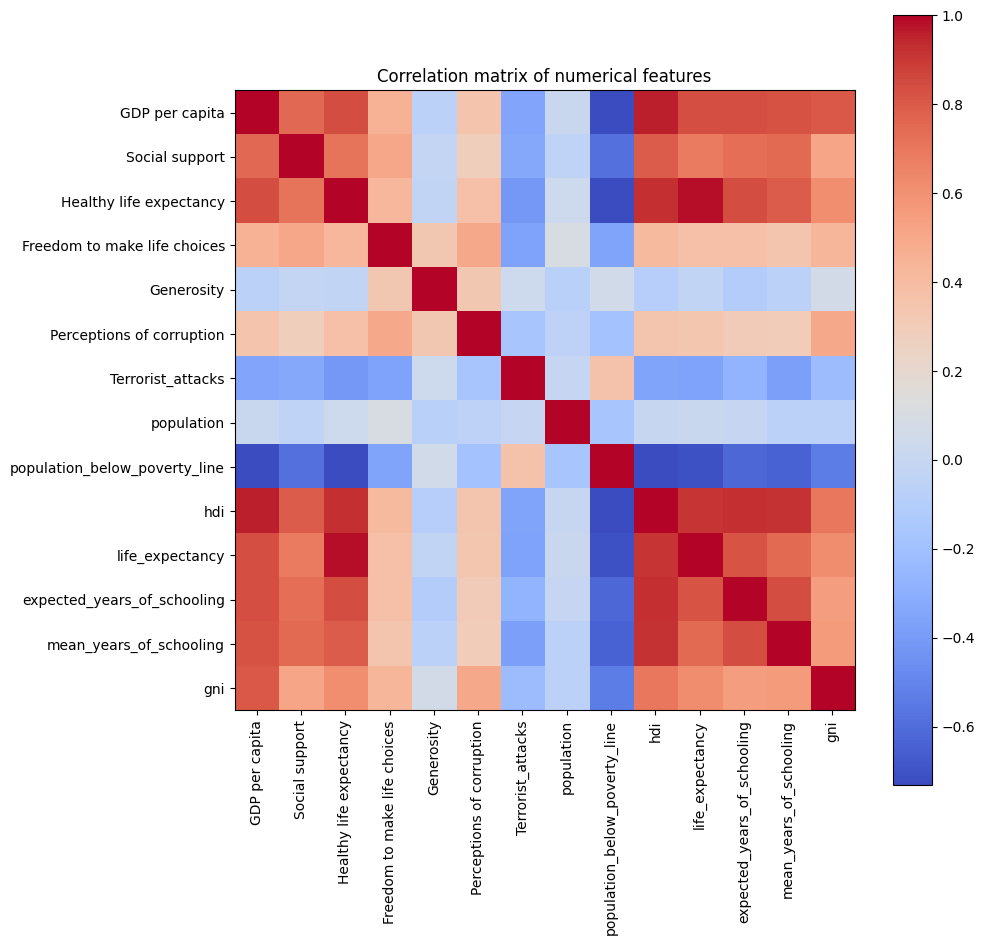

In [ ]:
# Correlation matrix of all numerical features

# Extract only the numerical features from X_train
numerical_features = X_train.select_dtypes(include=["float64", "int64"])

# Calculate the correlation matrix using pandas' built-in corr function
correlation_matrix = numerical_features.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 10))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.title("Correlation matrix of numerical features")
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns)
plt.show()

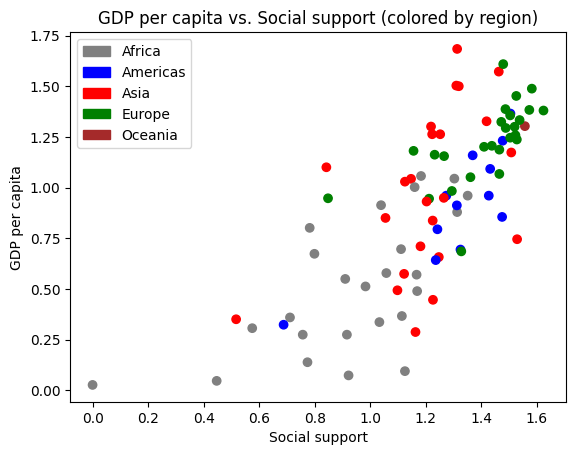

In [ ]:
# Scatter plot of GDP per capita vs. Social support
plt.scatter(X_train["Social support"], X_train["GDP per capita"], c=[color_mapping[region] for region in X_train["region"]])
plt.xlabel("Social support")
plt.ylabel("GDP per capita")
plt.title("GDP per capita vs. Social support (colored by region)")
plt.legend(handles=legend_elements)
plt.show()

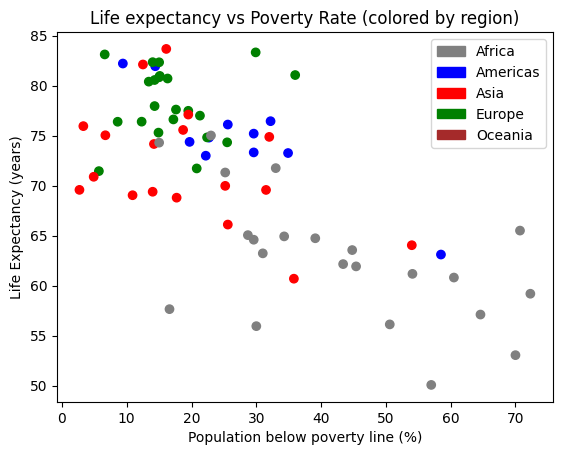

In [ ]:
# Scatter plot of Life expectancy vs. % population below poverty line
plt.scatter(X_train["population_below_poverty_line"], X_train["life_expectancy"], c=[color_mapping[region] for region in X_train["region"]])
plt.xlabel("Population below poverty line (%)")
plt.ylabel("Life Expectancy (years)")
plt.title("Life expectancy vs Poverty Rate (colored by region)")
plt.legend(handles=legend_elements)
plt.show()

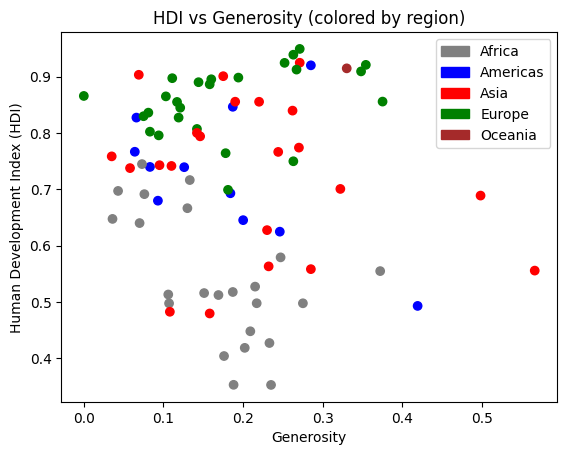

In [ ]:
# Scatter plot of HDI vs. Generosity
plt.scatter(X_train["Generosity"], X_train["hdi"], c=[color_mapping[region] for region in X_train["region"]])
plt.xlabel("Generosity")
plt.ylabel("Human Development Index (HDI)")
plt.title("HDI vs Generosity (colored by region)")
plt.legend(handles=legend_elements)
plt.show()

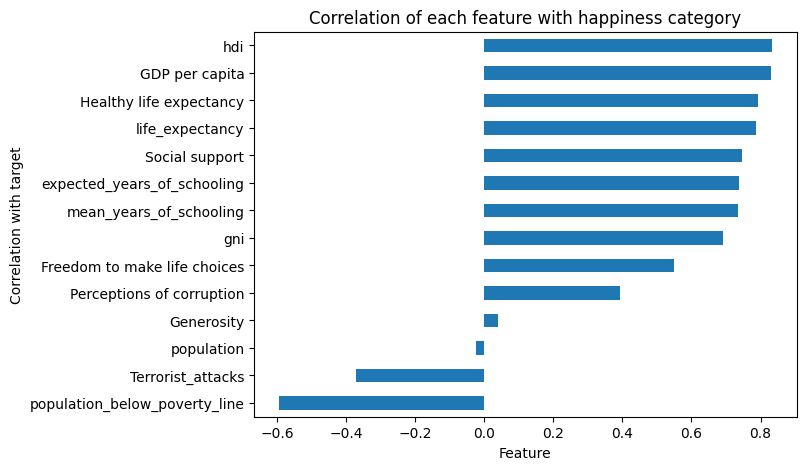

In [ ]:
# Correlation of each numerical feature with the target variable
numerical_features = X_train.select_dtypes(include=["float64", "int64"])

# Since happiness is a nominal categorical variable...
# Reorder the categories to be in order of increasing happiness
targets = y_train_labels.astype('category').cat.reorder_categories(
    ['Very Low', 'Low', 'Average', 'High', 'Very High'], ordered=True)
correlation_with_target = numerical_features.corrwith(targets.cat.codes)

# Plot the correlation
plt.figure(figsize=(7, 5))
correlation_with_target.sort_values().plot(kind="barh")
plt.xlabel("Feature")
plt.ylabel("Correlation with target")
plt.title("Correlation of each feature with happiness category")
plt.show()

Write what you observed and your General comments on what should be done:

In [ ]:
# Initially, to determine if there were any strong linear relationships between all numerical features, we plotted a correlation matrix of all the features.
# Seeing a strong positive correlation between GDP per capita and social support, we then verified this relationship with a scatter plot.
# However, between human development index (HDI) and generosity, we saw no clear relationship, which was also reflected in their respective scatter plot.
# Finally, we calculated the correlation of each numerical feature with the target variable (happiness).
# We found that HDI, GDP per capita, and healthy life expectancy had the highest correlation with happiness.
# On the other hand, the proportion of population below poverty line (poverty rate) and incidence of terrorist attacks had the highest negative correlation with happiness.

## 2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.

# Drop all the non-numerical features from X_train
numeric_features = X_train.select_dtypes(include=['int64', 'float64']) # documentation reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)), ## Is this good enough?
    ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Replace missing values with the Modal (most frequent) value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))]) # Ignore unknown categories when one-hot encoding
# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

In [ ]:
## Your answer :
# Using sklearn, we transform the data in the following way:
# For numerical features, we replace missing values with 0 and normalize the values by subtracting the mean and scaling to unit variance (StandardScaler).
# For categorical features, we replace missing values with the most frequent value and then one-hot encode the categorical features to convert them into a numerical format.
# Then, we combine these two transformations into a single preprocessor object using the ColumnTransformer class to create a single preprocessing pipeline.
# Finally, we fit the preprocessor object to the training data to learn the necessary transformations (more on this in a following cell).

In [ ]:
# Write function to transform data with preprocessor
def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?

In [ ]:
## Your Answer:
# The "preprocessor" object is a SciKit-Learn ColumnTransformer that takes in a list of transformers, where each transformer is a tuple containing the name of the transformer, the transformer object, and the columns to apply the transformer to.
# The "preprocess" object is the result of fitting the "preprocessor" object to the training data. This fitting process learns the parameters of the transformers to then apply these transformations to the training data.
# The "preprocessor" function takes in a dataframe and applies the preprocessing steps to it.
# The "preprocessed_data" object is the final result of applying the "preprocess" object to the input data. This object contains the preprocessed data that can be used for training our model.

In [ ]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(88, 33)

## 3. Fit model on preprocessed data and save preprocessor function and model


In [ ]:
from sklearn.ensemble import RandomForestClassifier

## Define a Random Forest Model here, fit it,
model = RandomForestClassifier(
    n_estimators=512,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    warm_start=True,
    random_state=42
)
# Fit the model to the preprocessed training data
preprocessed_data = preprocessor(X_train)
model.fit(preprocessed_data, y_train_labels)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=512, random_state=42, warm_start=True)

 What changes did you make from the default parameters, what do the parameters you changed control, and why does it improve performance?

In [ ]:
## Your answer
# 1. Increased the number of estimators (n_estimators) to 512 to increase the number of trees in the forest which allows the model to better learn the data.
# 2. Increased the maximum depth of the trees (max_depth) to 20 to increase the depth of the trees in the forest, but not too much to avoid overfitting.
# 3. Increased the minimum number of samples required to split an internal node (min_samples_split) to 5.
# 4. Increased the minimum number of samples required to be at a leaf node (min_samples_leaf) to 2.
# 5. Enabled warm start to allow the model to continue training from where it left off.
# All of these changes were an increase or addition to the original parameters.
# My blind rationale was that increasing the number of trees and depth would help improve performance (increasing complexity ==> better accuracy).
# This of course, is not necessarily true, but it is a good starting point.

#### Save preprocessor function to local "preprocessor.zip" file

In [ ]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"")

Your preprocessor is now saved to 'preprocessor.zip'


#### Save model to local ".onnx" file

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

## 4. Generate predictions from X_test data and submit model to competition


In [ ]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground
## Do not change this
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

Modelshare.ai Username:··········
Modelshare.ai Password:··········
Modelshare.ai login credentials set successfully.


In [ ]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [ ]:
#Submit Model:

#-- Generate predicted y values
prediction_labels = model.predict(preprocessor(X_test)) # Predict
model_filepath = "model.onnx" # Your serialized model
preprocessor_filepath = "preprocessor.zip" # Your preprocessor

# Submit Model 2 to Competition Leaderboard
mycompetition.submit_model(model = model_filepath,
                                 prediction_submission=prediction_labels,
                                 preprocessor=preprocessor_filepath)

Insert search tags to help users find your model (optional): Random Forest (iteration 2)
Provide any useful notes about your model (optional): Random Forest (iteration 2)

Your model has been submitted as model version 983

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [ ]:
# Compare two or more models
data=mycompetition.compare_models([976,983], verbose=1)
mycompetition.stylize_compare(data)

Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

In [ ]:
## Your answer:
# Yes, making these changes seems to have marginally improved the accuracy of the model from 38.24% to 44.12%.
# Albeit marginal, this does indicate that the second model with tuned hyperparameters beyond just the defaults has improved over the baseline model.
# However, manually hardcoding random values for hyperparameters is probably not the best way to tune a model. A more systematic approach such as grid search (see next cell) would likely be more effective.

In [ ]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Use np.arange to create a sequence of numbers for each parameter's space you think should be searched
param_grid = {
    'n_estimators': np.arange(100, 600, 100),
    'max_depth': np.arange(10, 60, 10),
    'min_samples_split': np.arange(2, 6, 2),
    'min_samples_leaf': np.arange(1, 5, 2),
    'criterion': ['gini', 'entropy'],
    'warm_start': [True, False],
}

# Read GridSearchCV docs and create an object with RandomForestClassifier as the model
model = RandomForestClassifier(random_state=42)
gridmodel = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

#use model methods to fit score and predict model:
preprocessed_data = preprocessor(X_train)
targets_numeric = y_train_labels.astype('category').cat.reorder_categories(
    ['Very Low', 'Low', 'Average', 'High', 'Very High'], ordered=True).cat.codes
gridmodel.fit(preprocessor(X_train), targets_numeric)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))

best mean cross-validation score: 0.659
best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'warm_start': True}


In [ ]:
# Given the best parameter values from GridSearchCV, train and save a model using those parameters
model_3 = RandomForestClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    warm_start=True,
)
preprocessed_data = preprocessor(X_train)
model_3.fit(preprocessed_data, y_train_labels)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       warm_start=True)

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model_3, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("gridmodel.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 3:

#-- Generate predicted values
prediction_labels = model_3.predict(preprocessor(X_test))

model_filepath3 = "gridmodel.onnx"
preprocessor_filepath="preprocessor.zip"

# Submit to Competition Leaderboard
mycompetition.submit_model(model = model_filepath3,
                           preprocessor=preprocessor_filepath,
                                 prediction_submission=prediction_labels)


Your model has been submitted as model version 987

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [ ]:
# Get leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

In [ ]:
# Compare two or more models
data=mycompetition.compare_models([976,983,987], verbose=1)
mycompetition.stylize_compare(data)

In [ ]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# # First, split the data into train and eval datasets
# X_train_split, X_eval_split, y_train_split, y_eval_split = train_test_split(X_train, y_train_labels, test_size=0.2, random_state=42)

# NOTE: Initially, I intended to split the data into train and test datasets but...
# since the training set is so small (n=88), I decided not to do that to improve the model's blind test set performance.
# Hence, the code above is commented out.

## Read documentations of imported models and fit them.
model = GradientBoostingClassifier(
    learning_rate=0.02,
    n_estimators=20,
    warm_start=True,
)
model.fit(preprocessor(X_train), y_train_labels)

# Fit model on training dataset
# model.fit(preprocessor(X_train_split), y_train_split)

# Score the model on the evaluation dataset
# model.score(preprocessor(X_eval_split), y_eval_split)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, random_state=0)

In [ ]:

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values
prediction_labels = model.predict(preprocessor(X_test))

model_filepath4 = "model.onnx"
preprocessor_filepath="preprocessor.zip"

# Submit model to Competition Leaderboard
mycompetition.submit_model(model = model_filepath4,
                                 prediction_submission=prediction_labels,
                                 preprocessor=preprocessor_filepath)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): GradientBoostingClassifier (iteration 3)

Your model has been submitted as model version 1070

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

In [ ]:
## Your answer:
# Reduced the learning rate to 0.02, to allow the model to learn more slowly with smaller steps (to avoid overshooting the minimum).
# ^ This is a common technique to improve the performance of gradient boosting models, and it seemed to work here.
# Set the number of estimators to 20, to reduce the number of trees in the forest to avoid overfitting.
# Also experimented with max_depth to see if shallow trees would improve performance, since the dataset is quite small. However, this did not seem to improve performance.
# Finally, enabling warm start also did not seem to improve performance.

# 6. Basic Deep Learning

In [ ]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

#count features in input data
feature_count = preprocessor(X_train).shape[1]
output_count = len(y_train_labels.unique())

## Define a Neural Network Model with 5 layers 128->64->64->32->(?)
keras_model = Sequential([
    Dense(128, input_shape=(feature_count,), activation='gelu'),
    Dense(64, activation='gelu'),
    Dense(64, activation='gelu'),
    Dense(32, activation='gelu'),
    Dense(output_count, activation='softmax')
])

#Use Softmax activation in last layer. How many neurons should there be in the last layer?
# The last layer should have as many neurons as there are unique classes in the target variable (derived from y_train_labels).

# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
history = keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20,
               epochs = 300, validation_split=0.25)

Epoch 1/300
4/4 [==============================] - 2s 142ms/step - loss: 1.6257 - accuracy: 0.1364 - val_loss: 1.6281 - val_accuracy: 0.0909
Epoch 2/300
4/4 [==============================] - 0s 43ms/step - loss: 1.6232 - accuracy: 0.1364 - val_loss: 1.6272 - val_accuracy: 0.0455
Epoch 3/300
4/4 [==============================] - 0s 20ms/step - loss: 1.6202 - accuracy: 0.1667 - val_loss: 1.6262 - val_accuracy: 0.0455
Epoch 4/300
4/4 [==============================] - 0s 23ms/step - loss: 1.6180 - accuracy: 0.1818 - val_loss: 1.6255 - val_accuracy: 0.0455
Epoch 5/300
4/4 [==============================] - 0s 23ms/step - loss: 1.6147 - accuracy: 0.2121 - val_loss: 1.6243 - val_accuracy: 0.0455
Epoch 6/300
4/4 [==============================] - 0s 19ms/step - loss: 1.6119 - accuracy: 0.2424 - val_loss: 1.6236 - val_accuracy: 0.0000e+00
Epoch 7/300
4/4 [==============================] - 0s 17ms/step - loss: 1.6091 - accuracy: 0.2424 - val_loss: 1.6218 - val_accuracy: 0.0000e+00
Epoch 8/300

Which activations did you use in the middle layers? Why was softmax used in the last layer?

In [ ]:
## Your answer:
# Instead of the conventional ReLU (Rectified Linear Unit) activation function, we opted for GELU (Gaussian Error Linear Unit).
# GELU provides a smoother, more continuous shape than ReLU and prior literature has shown that this provides better performance as seen in Google's BERT and OpenAI's GPT models (ref: https://proceedings.neurips.cc/paper_files/paper/2021/hash/2f3c6a4cd8af177f6456e7e51a916ff3-Abstract.html).
# Softmax was used in the last layer to output the probability of each class (in this case, 5), and each neuron in the final layer outputs the probability of that class.

Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?

In [ ]:
## Your answer:
# At the end of 300 epochs of training, the training accuracy stands at ~86.36% while the validation accuracy stands at ~72.73%, which outperforms all iterations of the Random Forest and Gradient Boosting models.
# At around epoch 198, the training accuracy continues to rise, but the validation accuracy begins to either plateau or fall marginally.
# This indicates that the model begins to overfit around the 198 epoch mark, so perhaps further training without changing the methodology may not be ideal.
# Some possible ways to mitigate this would be to:
# 1. use a scheduler to decay the learning rate
# 2. implement early stopping (prevent the model from continuing to train if it starts to overfit)
# 3. use a different model architecture (introduce regularization, dropout, etc.)

Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?

In [ ]:
## Your answer:
# Since this is a multi-class classification problem (picking one of 5 classes), we used the categorical_crossentropy loss function which is suitable for such problems (as opposed to using binary_crossentropy loss, which would be used for binary classification problems where the outputs could be yes/no).
# We use the stochastic gradient descent (SGD) optimizer to minimize the loss function because it is a simple and effective optimizer that works well for many problems.
# One possible improvement could be to use a more advanced optimizer such as Adam or RMSprop, which are known to work well for a wide range of problems and are less sensitive to the choice of learning rate.

Can you try getting the model's training history out and plotting the curves?

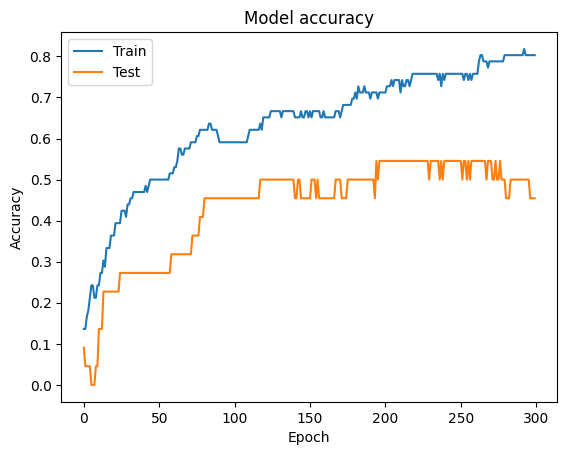

In [ ]:
## Your code to plot training and validation curves in a single plot (Make changes in the model cell to be able to do this)
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Save keras model to ONNX file

from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(keras_model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
# Submit keras model:

#-- Generate predicted y values

#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index = keras_model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

model_filepath5 = "model.onnx"
preprocessor_filepath="preprocessor.zip"

# Submit Model 5 to Competition Leaderboard
mycompetition.submit_model(model = model_filepath5,
                                 prediction_submission=prediction_labels,
                                 preprocessor=preprocessor_filepath)

3/3 [==============================] - 0s 6ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): MLP (iteration 2)

Your model has been submitted as model version 1094

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [ ]:
# Check leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

In [ ]:
## You are encouraged to try more experimentation and any other models by adding more code cells to this notebook:

## You can also try to import any new dataset pertaining to countries, merge it, and see if it helps the predictions.
## If it does not, try to explain why it wasn't helpful by exploring variable relationships.

In [ ]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import regularizers
from keras.callbacks import LearningRateScheduler, EarlyStopping
# Count features in input data
feature_count = preprocessor(X_train).shape[1]
output_count = len(y_train_labels.unique())

## Define an improved Neural Network Model
# Main changes:
# 1) Added an extra dense layer to now have 8 layers: 512->256->128->128->64->64->32->5
# 2) Use the newer swish activation function, which is a popular alternative to ReLU and GELU
# 3) Add dropout layers between each dense layer which randomly sets a fraction of input units to 0 at each update during training (reduces overfitting)
# 4) Add batch normalization layers which normalizes the output of the previous layer at each batch, i.e. applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1
# 5) Use L2 regularization which ALSO prevents overfitting by adding a penalty to the loss function
keras_model = Sequential([
    Dense(1024, input_shape=(feature_count,), activation='relu'),
    Dropout(0.2),
    Dense(512, activation='swish', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(256, activation='swish', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='swish', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='swish', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='swish', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='swish', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='swish', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(output_count, activation='softmax')
])

# Define learning rate scheduler that reduces the learning rate by 0.1 every 50 epochs
# This is a common technique to improve convergence
def lr_scheduler(epoch, lr):
    decay_rate = 0.1
    decay_step = 50
    if epoch % decay_step == 0 and epoch > 0:
        return lr * decay_rate
    return lr

# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping to stop training after 20 epochs of no improvement (prevents overfitting)
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# Fitting the NN to the Training set
history = keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20,
               epochs = 300,
               validation_split=0.25,
               callbacks=[LearningRateScheduler(lr_scheduler), early_stopping])


Epoch 1/300
4/4 [==============================] - 5s 164ms/step - loss: 17.2791 - accuracy: 0.2576 - val_loss: 16.7101 - val_accuracy: 0.5455 - lr: 0.0010
Epoch 2/300
4/4 [==============================] - 0s 24ms/step - loss: 17.0580 - accuracy: 0.2727 - val_loss: 16.6853 - val_accuracy: 0.3182 - lr: 0.0010
Epoch 3/300
4/4 [==============================] - 0s 26ms/step - loss: 17.0319 - accuracy: 0.2879 - val_loss: 16.6592 - val_accuracy: 0.4091 - lr: 0.0010
Epoch 4/300
4/4 [==============================] - 0s 26ms/step - loss: 16.9666 - accuracy: 0.2576 - val_loss: 16.6272 - val_accuracy: 0.4091 - lr: 0.0010
Epoch 5/300
4/4 [==============================] - 0s 30ms/step - loss: 16.7056 - accuracy: 0.3030 - val_loss: 16.5890 - val_accuracy: 0.3636 - lr: 0.0010
Epoch 6/300
4/4 [==============================] - 0s 30ms/step - loss: 16.6379 - accuracy: 0.3182 - val_loss: 16.5427 - val_accuracy: 0.4091 - lr: 0.0010
Epoch 7/300
4/4 [==============================] - 0s 25ms/step - los

In [ ]:
# Save keras model to ONNX file

from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(keras_model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model_mlp2.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
# Submit keras model:

#-- Generate predicted y values

#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index= keras_model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

model_filepath6 = "model_mlp2.onnx"
preprocessor_filepath="preprocessor.zip"

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model = model_filepath6,
                                 prediction_submission=prediction_labels,
                                 preprocessor=preprocessor_filepath)

3/3 [==============================] - 0s 5ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 1102

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164
